In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [2]:
#Loading dataset
train_data=pd.read_excel("C:/Users/risha/Downloads/q1train.xlsx")
test_data=pd.read_excel("C:/Users/risha/Downloads/q1test.xlsx")

In [3]:
train_data.head()

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [9]:
#assigning X train, Y train, X test
tr=train_data.to_numpy()
ts=test_data.to_numpy()
X_train=tr[:,0:2]
Y_train=tr[:,-1]
X_test=ts[:,0:2]

In [10]:
#Normalizing Dataset
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
#Reshaping arrays
X_train=X_train.T
X_test=X_test.T
#converting rank 1 matrix to (,1)
Y_train=np.reshape(Y_train,(Y_train.shape[0],1))
Y_train=Y_train.T

In [32]:
#MLP Classifier from sklearn
clf = MLPClassifier(hidden_layer_sizes=(4,1), activation='tanh', random_state=1, max_iter=10000).fit(X_train, Y_train)

In [33]:
y_pred=clf.predict(X_train)

In [52]:
clf.coefs_

[array([[-0.51549643,  1.06786246, -1.79547785,  0.26240305],
        [-2.0240189 , -0.18390299, -0.24005669, -0.48743185]]),
 array([[-1.40216207],
        [ 1.90156296],
        [-1.66920773],
        [ 0.62396727]]),
 array([[1.14842685]])]

In [34]:
clf.score(X_train, Y_train)

0.8285714285714286

In [46]:
#Plotting decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'MLP Classifier')

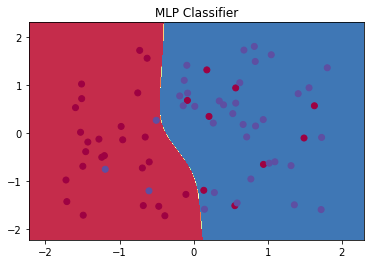

In [47]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("MLP Classifier")

In [49]:
predictions = clf.predict(X_test)

In [50]:
np.savetxt('mlp_sklearn_test.txt', predictions, fmt ='%.0f\n')

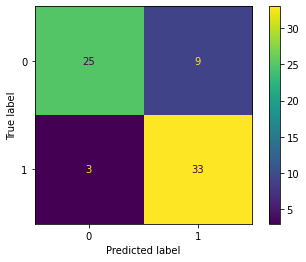

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()